In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [26]:
team_df = pd.read_csv('Teams.csv')
team_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [60]:
team_df = team_df[team_df['yearID'] > 1994]  #using only data from 1995-2019


In [263]:
team_df.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

## Exploring the Data

In [80]:

print(team_df.groupby('lgID')['attendance'].mean())  #see if the average attendance of NL/AL
print(team_df.groupby('lgID')['attendance'].std()) 
print(team_df.groupby('lgID')['attendance'].count())

import statsmodels.api as sm 
tstat, pvalue = sm.stats.CompareMeans.from_data(team_df[team_df['lgID'] == 'AL']['attendance'], team_df[team_df['lgID'] == 'AL']['attendance']).ztest_ind(usevar='unequal')

lgID
AL    2.280303e+06
NL    2.486471e+06
Name: attendance, dtype: float64
lgID
AL    708549.138958
NL    707515.347490
Name: attendance, dtype: float64
lgID
AL    357
NL    387
Name: attendance, dtype: int64


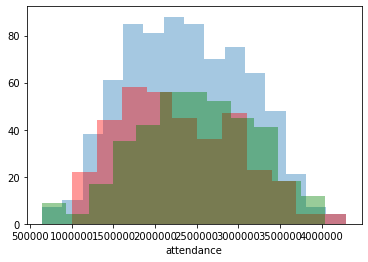

In [58]:
from scipy.stats import norm 
ax1 = sns.distplot(team_df['attendance'], kde=False)
sns.distplot(team_df[team_df['lgID']=='AL']['attendance'], color='r', ax=ax1, kde=False)
sns.distplot(team_df[team_df['lgID']=='NL']['attendance'], color='g', ax=ax1, kde=False)

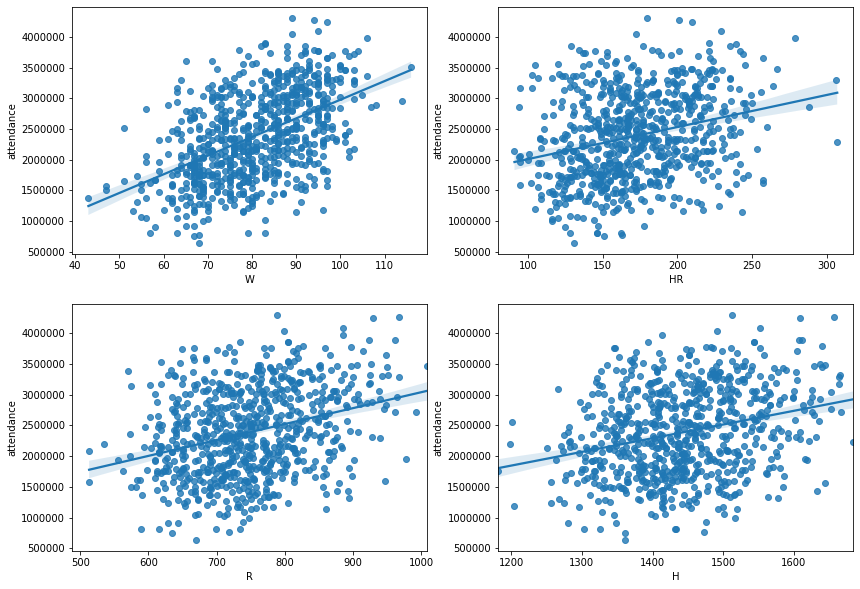

In [328]:
rows, cols = 2, 2
plt.figure(figsize=(14,10))
plt.subplot(rows, cols, 1)
sns.regplot(x='W', y='attendance', data=team_df, label='Wins')
plt.subplot(rows, cols, 2)
sns.regplot(x='HR', y='attendance', data=team_df)
plt.subplot(rows, cols, 3)
sns.regplot(x='R', y='attendance', data=team_df)
plt.subplot(rows, cols, 4)
sns.regplot(x='H', y='attendance', data=team_df)
plt.savefig('scatter_linear_reg')

In [140]:
team_df[['attendance', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'W', 'L', 'R', 'E']].corr()['attendance'].sort_values(ascending=False)

attendance    1.000000
W             0.500461
R             0.312266
H             0.274978
HR            0.269356
BB            0.237644
2B            0.112769
SF            0.110917
HBP           0.041127
SB           -0.029760
3B           -0.061749
SO           -0.074900
CS           -0.139414
E            -0.232152
ER           -0.263962
RA           -0.286550
ERA          -0.299198
L            -0.451873
Name: attendance, dtype: float64

In [256]:
postseason_df = team_df[['DivWin', 'WCWin', 'LgWin', 'WSWin', 'attendance']].reset_index(drop=True)
postseason_df['postseason'] = postseason_df.apply(lambda row: 1 if 'Y' in row.values else 0 , axis=1)
print(postseason_df.groupby('postseason')['attendance'].mean())

postseason
0    2.207390e+06
1    2.827918e+06
Name: attendance, dtype: float64


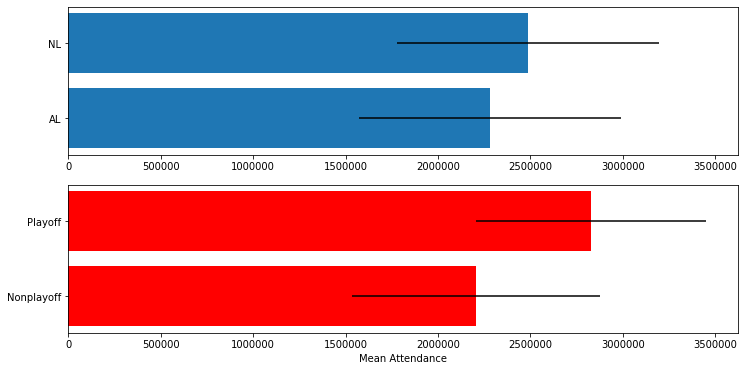

In [322]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
league = team_df.groupby('lgID')['attendance'].mean()
league_std = team_df.groupby('lgID')['attendance'].std()
plt.barh(league.index, league.values, xerr=league_std)
plt.subplot(2, 1, 2, sharex=ax1)
post = postseason_df.groupby('postseason')['attendance'].mean()
post_std = postseason_df.groupby('postseason')['attendance'].std()
plt.barh(['Nonplayoff', 'Playoff'], post.values, color='r', xerr=post_std)
plt.savefig('league_and_playoff_bar')
plt.xlabel('Mean Attendance')
plt.show()

In [304]:
a = postseason_df[postseason_df['postseason'] == 1]['attendance']
b = postseason_df[postseason_df['postseason'] == 0]['attendance']
tstat, pvalue = sm.stats.CompareMeans.from_data(a, b).ztest_ind(usevar='unequal')
print(tstat, pvalue)

12.051479933845284 1.9049854764786057e-33


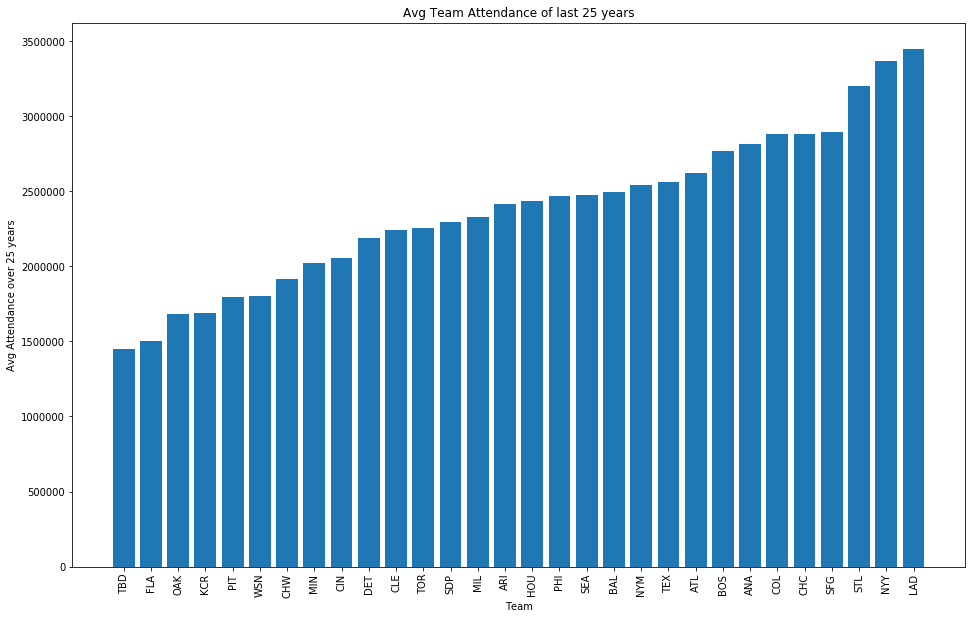

In [334]:
attendance = team_df.groupby('franchID')['attendance'].mean().sort_values()
plt.figure(figsize=(16, 10))
#plt.bar(range(attendance.shape[0]), attendance.values, tick_label=attendance.index)
plt.bar(attendance.index, attendance.values)
plt.xlabel('Team')
plt.ylabel('Avg Attendance over 25 years')
plt.title("Avg Team Attendance of last 25 years")
plt.xticks(rotation=90)
plt.savefig('mean_attendance_team')
plt.show()

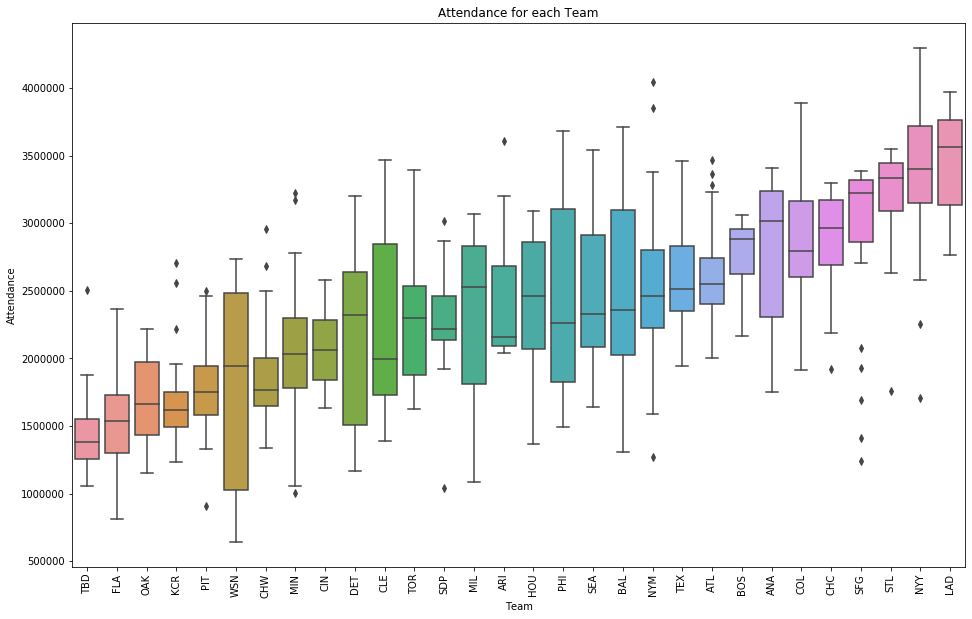

In [298]:
plt.figure(figsize=(16,10))
sns.boxplot(x='franchID', y='attendance', data=team_df, order=attendance.index)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Attendance')
plt.title('Attendance for each Team')
plt.savefig('attendance_team_boxplot')
plt.show()

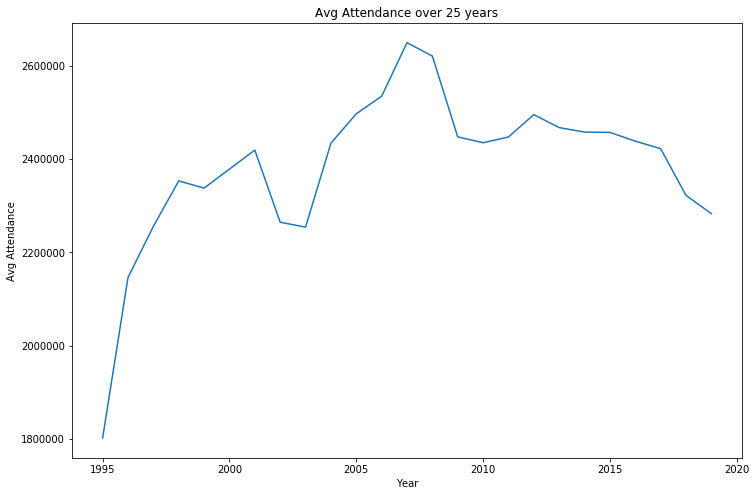

In [288]:
plt.figure(figsize=(12,8))
plt.plot(range(1995, 2020), team_df.groupby('yearID')['attendance'].mean().astype('int64'))
plt.xlabel('Year')
plt.ylabel('Avg Attendance')
plt.title('Avg Attendance over 25 years')
plt.savefig('mean_attendance_time')
plt.show()

In [285]:
team_df['attendance'].mean()

2387543.3225806453

## Clean and Prepare Data

In [120]:
x_data = team_df.drop(['yearID', 'teamID', 'divID', 'G', 'Ghome', 'name', 'park', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro', 'attendance' ], axis=1)
x_data.replace(['NL', 'AL', 'N', 'Y'], [0, 1, 0, 1], inplace=True)
print(x_data.shape)
x_data.head()

(744, 35)


,lgID,franchID,Rank,W,L,DivWin,WCWin,LgWin,WSWin,R,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
2181,0,ATL,1,90,54,1,0,1,1,645,...,11,34,3875,1184,107,436,1087,100,113,0.982
2182,1,BAL,3,71,73,0,0,0,0,704,...,10,29,3801,1165,149,523,930,72,141,0.986
2183,1,BOS,1,86,58,1,0,0,0,791,...,9,39,3878,1338,127,476,888,120,151,0.978
2184,1,ANA,2,78,67,0,0,0,0,801,...,9,42,3853,1310,163,486,901,95,120,0.982
2185,1,CHW,3,68,76,0,0,0,0,755,...,4,36,3854,1374,164,617,892,108,131,0.980


In [121]:
x_data = pd.concat([x_data, pd.get_dummies(x_data['franchID'])], axis=1)

In [130]:
x_data.reset_index(drop=True, inplace=True)
x_data.drop('franchID', axis=1, inplace=True)
print(x_data.shape)

(744, 64)


In [136]:
y_data = team_df['attendance'].reset_index(drop=True)
print(y_data.shape)

(744,)


In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(595, 64) (149, 64) (595,) (149,)


## Model Training and Evaluation

In [168]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


423805.9703460921
0.6192691248378422


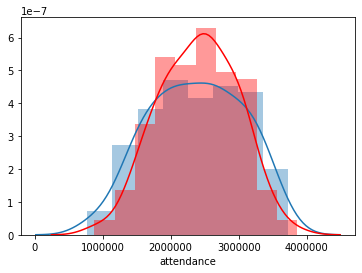

In [169]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(x_train, y_train)
y_test_pred = model_lin_reg.predict(x_test)
rmse_lin_reg = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_lin_reg)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()

427167.01858466415
0.6132063075979206


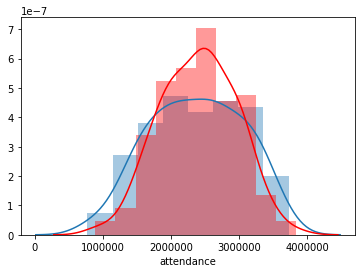

In [175]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)
y_test_pred = model_ridge.predict(x_test)
rmse_ridge = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_ridge)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()

788233.8855809786
-0.3170254216116217


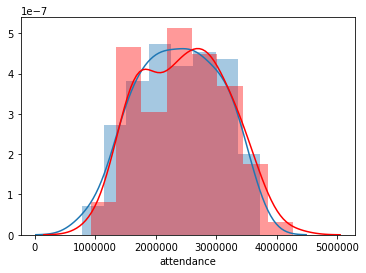

In [170]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_test_pred = model_svm.predict(x_test)
rmse_svm = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_svm)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()

712579.5757826847
-0.07634301467319404


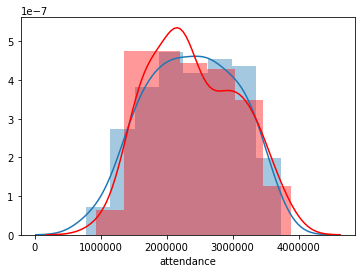

In [171]:
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
y_test_pred = model_tree.predict(x_test)
rmse_tree = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_tree)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()


549887.1094285146
0.3590398429449644


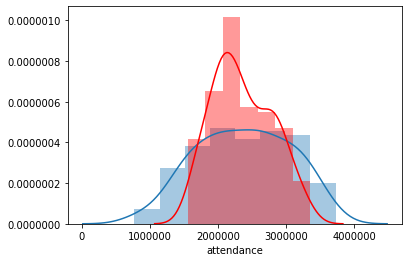

In [172]:
model_forest = RandomForestRegressor()
model_forest.fit(x_train, y_train)
y_test_pred = model_forest.predict(x_test)
rmse_forest = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_forest)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()

461068.32721421204
0.5493757747233328


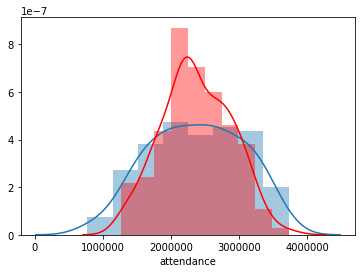

In [174]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)
y_test_pred = model_gb.predict(x_test)
rmse_gb = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_gb)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [211]:
model_nn = models.Sequential()
model_nn.add(layers.Dense(128, activation='relu', input_shape=(64,)))
model_nn.add(layers.Dense(128, activation='relu'))
model_nn.add(layers.Dense(1))
model_nn.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [212]:
history = model_nn.fit(x_train_scaled, y_train, epochs=300, batch_size=1)

04863.4735 - mean_squared_error: 72252104863.4735
Epoch 151/300
595/595 [==============================] - 1s 2ms/step - loss: 72274723116.7509 - mean_squared_error: 72274723116.7509
Epoch 152/300
595/595 [==============================] - 1s 1ms/step - loss: 71785955849.9717 - mean_squared_error: 71785955849.9717
Epoch 153/300
595/595 [==============================] - 1s 2ms/step - loss: 71338326519.0449 - mean_squared_error: 71338326519.0449
Epoch 154/300
595/595 [==============================] - 1s 2ms/step - loss: 70958144043.0296 - mean_squared_error: 70958144043.0296
Epoch 155/300
595/595 [==============================] - 1s 1ms/step - loss: 70626150750.4097 - mean_squared_error: 70626150750.4097
Epoch 156/300
595/595 [==============================] - 1s 1ms/step - loss: 70282476030.6101 - mean_squared_error: 70282476030.6101
Epoch 157/300
595/595 [==============================] - 1s 2ms/step - loss: 69937226654.9186 - mean_squared_error: 69937226654.9186
Epoch 158/300
595/5

402277.8900724667
0.6569666984090616


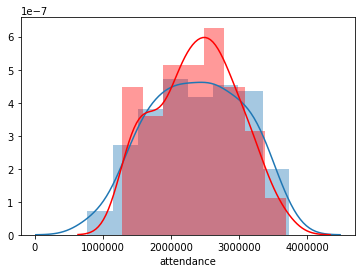

In [213]:
y_test_pred = model_nn.predict(x_test_scaled)
rmse_nn = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_nn)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()

In [225]:
model_nn = models.Sequential()
model_nn.add(layers.Dense(128, activation='sigmoid', input_shape=(64,)))
model_nn.add(layers.Dense(128, activation='relu'))
model_nn.add(layers.Dense(1))
model_nn.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [226]:
history = model_nn.fit(x_train_scaled, y_train, epochs=300, batch_size=1)

17021.4794 - mean_squared_error: 47579817021.4794
Epoch 151/300
595/595 [==============================] - 1s 2ms/step - loss: 47156195802.0432 - mean_squared_error: 47156195802.0432
Epoch 152/300
595/595 [==============================] - 1s 2ms/step - loss: 46793749192.5328 - mean_squared_error: 46793749192.5328
Epoch 153/300
595/595 [==============================] - 1s 2ms/step - loss: 46379135771.8549 - mean_squared_error: 46379135771.8549
Epoch 154/300
595/595 [==============================] - 1s 2ms/step - loss: 45969072457.1867 - mean_squared_error: 45969072457.1867
Epoch 155/300
595/595 [==============================] - 1s 2ms/step - loss: 45571527294.3528 - mean_squared_error: 45571527294.3528
Epoch 156/300
595/595 [==============================] - 1s 2ms/step - loss: 45222180489.0191 - mean_squared_error: 45222180489.0191
Epoch 157/300
595/595 [==============================] - 1s 2ms/step - loss: 44856193398.4728 - mean_squared_error: 44856193398.4728
Epoch 158/300
595/5

399502.21114297037
0.6616841609282533


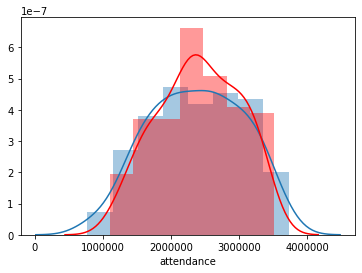

In [227]:
y_test_pred = model_nn.predict(x_test_scaled)
rmse_nn = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_nn)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()

In [238]:
model_nn = models.Sequential()
model_nn.add(layers.Dense(256, activation='sigmoid', input_shape=(64,)))
model_nn.add(layers.Dense(128, activation='relu'))
model_nn.add(layers.Dense(1))
model_nn.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [239]:
history = model_nn.fit(x_train_scaled, y_train, epochs=300, batch_size=1)

70394.3572 - mean_squared_error: 35045670394.3572
Epoch 151/300
595/595 [==============================] - 1s 2ms/step - loss: 34729162473.6656 - mean_squared_error: 34729162473.6656
Epoch 152/300
595/595 [==============================] - 1s 2ms/step - loss: 34423887380.3537 - mean_squared_error: 34423887380.3537
Epoch 153/300
595/595 [==============================] - 1s 2ms/step - loss: 34082618894.3733 - mean_squared_error: 34082618894.3733
Epoch 154/300
595/595 [==============================] - 1s 2ms/step - loss: 33824485857.3321 - mean_squared_error: 33824485857.3321
Epoch 155/300
595/595 [==============================] - 1s 2ms/step - loss: 33491768299.5086 - mean_squared_error: 33491768299.5086
Epoch 156/300
595/595 [==============================] - 1s 2ms/step - loss: 33123771875.1070 - mean_squared_error: 33123771875.1070
Epoch 157/300
595/595 [==============================] - 1s 2ms/step - loss: 32953501909.8387 - mean_squared_error: 32953501909.8387
Epoch 158/300
595/5

388487.7712303353
0.6800820107942679


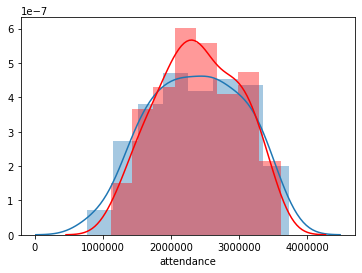

In [240]:
y_test_pred = model_nn.predict(x_test_scaled)
rmse_nn = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_nn)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()

In [244]:
model_nn = models.Sequential()
model_nn.add(layers.Dense(256, activation='sigmoid', input_shape=(64,)))
model_nn.add(layers.Dense(256, activation='relu'))
model_nn.add(layers.Dense(1))
model_nn.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [245]:
history = model_nn.fit(x_train_scaled, y_train, epochs=300, batch_size=1)

==============] - 1s 2ms/step - loss: 24995967554.4586 - mean_squared_error: 24995967554.4586
Epoch 151/300
595/595 [==============================] - 2s 3ms/step - loss: 24747374308.9354 - mean_squared_error: 24747374308.9354
Epoch 152/300
595/595 [==============================] - 1s 2ms/step - loss: 24542388250.9669 - mean_squared_error: 24542388250.9669
Epoch 153/300
595/595 [==============================] - 1s 2ms/step - loss: 24348322252.2154 - mean_squared_error: 24348322252.2154
Epoch 154/300
595/595 [==============================] - 2s 3ms/step - loss: 24148140870.2608 - mean_squared_error: 24148140870.2608
Epoch 155/300
595/595 [==============================] - 1s 2ms/step - loss: 23959955053.6075 - mean_squared_error: 23959955053.6075
Epoch 156/300
595/595 [==============================] - 1s 2ms/step - loss: 23762390672.0280 - mean_squared_error: 23762390672.0280
Epoch 157/300
595/595 [==============================] - 1s 2ms/step - loss: 23579981040.6882 - mean_squared

389264.26878586586
0.6788018479797987


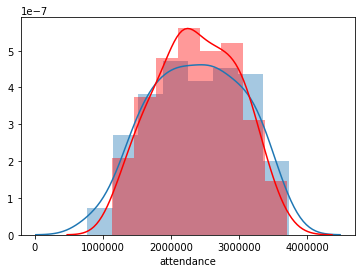

In [246]:
y_test_pred = model_nn.predict(x_test_scaled)
rmse_nn = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_nn)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()

615467.3654908694
0.19703980647025354


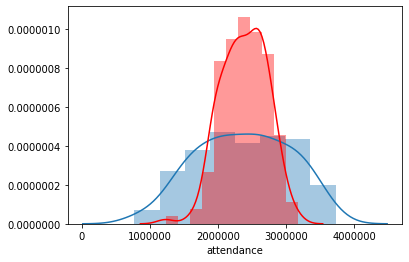

In [333]:
model_lin_reg_wins = LinearRegression()
model_lin_reg_wins.fit(x_train[['W']], y_train)
y_test_pred = model_lin_reg_wins.predict(x_test[['W']])
rmse_lin_reg_wins = mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_lin_reg_wins)
print(r2_score(y_test, y_test_pred))
ax1 = sns.distplot(y_test)
sns.distplot(y_test_pred, color='r', ax=ax1)
plt.show()